In [1]:
from regression_toolbox.model import Model, add_model, delete_model
from regression_toolbox.likelihood import Likelihood
from regression_toolbox.parameter import Parameter
from visualisation_toolbox.domain import Domain
from regression_toolbox.sampler import Sampler
from visualisation_toolbox.visualiser import RegressionVisualiser
from data_processing.sim_data_processor import SimDataProcessor
from data_processing.raw_data_processor import RawDataProcessor
import numpy as np
import pandas as pd
import os
import jax

os.chdir('/PhD_project/')

jax.config.update("jax_enable_x64", True)


/build/miniconda3/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
sim_model = Model('line').add_fixed_model_param('a', 1).add_fixed_model_param('b', 1)
sim_domain = Domain(1, 'linear').add_domain_param('min', 0).add_domain_param('max', 100).add_domain_param('n_points', 50)
sim_domain.build_domain()
sim_data_processor = SimDataProcessor('linear_example', sim_model, sim_domain,noise_dist='gaussian' ,noise_level=1)

model = Model('line')
likelihood = Likelihood('gaussian')

a = Parameter(name='a',prior_select='gaussian').add_prior_param('mu', 1).add_prior_param('sigma', 1)
b = Parameter(name='b',prior_select='gaussian').add_prior_param('mu', 1).add_prior_param('sigma', 1)

sigma = Parameter(name='sigma',prior_select='uniform').add_prior_param('low',  0.0001).add_prior_param('high', 5)

inference_params = pd.Series({'a': a, 'b': b, 'sigma': sigma})
sampler = Sampler(inference_params, model, likelihood, sim_data_processor, n_samples = 10000, n_chains=3)
sampler.sample_all()

visualiser = RegressionVisualiser(sampler)
visualiser.get_traceplots()
visualiser.get_autocorrelations()

visualiser.plot_prior('a', [-2,2])
visualiser.plot_prior('b', [-2,2])
visualiser.plot_prior('sigma', [0,5])

visualiser.plot_posterior('a', [-2,2])
visualiser.plot_posterior('b', [-2,2])
visualiser.plot_posterior('sigma', [0,5])

vis_domain = Domain(1, 'linear').add_domain_param('min', 0).add_domain_param('max', 100).add_domain_param('n_points', 100)
vis_domain.build_domain()
visualiser.show_predictions(sim_domain, 'test_plot', '1D')

Data loaded from /PhD_project/data/processed_sim_data/linear_example
Plot saved at: /PhD_project/data/processed_sim_data/linear_example
Samples loaded from /PhD_project/results/regression_results/linear_example/instance_2


In [3]:

sim_model = Model('polynomial').add_fixed_model_param('a', 1.8).add_fixed_model_param('b', 2.8).add_fixed_model_param('c', 1.4)
sim_domain = Domain(1, 'linear').add_domain_param('min', -3).add_domain_param('max', 3).add_domain_param('n_points', 100)
sim_domain.build_domain()

sim_data_processor = SimDataProcessor('polynomial_example', sim_model, sim_domain, noise_dist='gaussian', noise_level=1)

model = Model('polynomial')
likelihood = Likelihood('gaussian')

a_b = Parameter(name=['a','b'], prior_select='log_norm').add_prior_param('peak', [1.8, 2.8]).add_prior_param('scale', [[0.1, 0], [0, 0.1]])
# a = Parameter(name='a', prior_select='gaussian').add_prior_param('mu', 1.8).add_prior_param('sigma', 0.1)
# b = Parameter(name='b', prior_select='gaussian').add_prior_param('mu', 2.8).add_prior_param('sigma', 0.1)
c = Parameter(name='c', prior_select='gaussian').add_prior_param('mu', 1.4).add_prior_param('sigma', 0.1)
epsilon = Parameter(name='sigma', prior_select='uniform').add_prior_param('low', 0.0001).add_prior_param('high', 3)

inference_params = pd.Series({'a_and_b': a_b, 'c': c, 'sigma': epsilon})
# inference_params = pd.Series({'a': a, 'b': b, 'c': c, 'sigma': epsilon})

sampler = Sampler(inference_params, model, likelihood, sim_data_processor, n_samples=10000, n_chains=3)
sampler.sample_all()

visualiser = RegressionVisualiser(sampler)
visualiser.get_traceplots()
visualiser.get_autocorrelations()

visualiser.plot_prior('a_and_b', [[0.001, 5], [0.001, 5]])
# visualiser.plot_prior('a', [1, 2])
# visualiser.plot_prior('b', [2, 3])
visualiser.plot_prior('c', [-3, 3])
visualiser.plot_prior('sigma', [0, 5])

visualiser.plot_posterior('a_and_b', [[0.001, 5], [0.001, 5]])
# visualiser.plot_posterior('a', [1, 2])
# visualiser.plot_posterior('b', [2, 3])
visualiser.plot_posterior('c', [-3, 3])
visualiser.plot_posterior('sigma', [0, 0.5])

vis_domain = Domain(1, 'linear').add_domain_param('min', 0).add_domain_param('max', 100).add_domain_param('n_points', 100)
vis_domain.build_domain()
visualiser.show_predictions(sim_domain, 'test_plot', '1D')


Data loaded from /PhD_project/data/processed_sim_data/polynomial_example
Plot saved at: /PhD_project/data/processed_sim_data/polynomial_example
Samples loaded from /PhD_project/results/regression_results/polynomial_example/instance_9


In [ ]:
delete_model('plane')
add_model('plane', 'a*x + b*y', ['x', 'y'], 'C', ['a', 'b'])

sim_model = Model('plane').add_fixed_model_param('a', 1).add_fixed_model_param('b', 2)
sim_domain = Domain(2, 'rectangular').add_domain_param('min_x', -3)\
                                    .add_domain_param('max_x', 3)\
                                    .add_domain_param('n_points_x', 20)\
                                    .add_domain_param('min_y', -3)\
                                    .add_domain_param('max_y', 3)\
                                    .add_domain_param('n_points_y', 20)
sim_domain.build_domain()

sim_data_processor = SimDataProcessor('multi_dim_example', sim_model, sim_domain, noise_dist='gaussian', noise_level=1)

model = Model('plane')
likelihood = Likelihood('gaussian')

# a_b = Parameter(name=['a','b'], prior_select='log_norm').add_prior_param('peak', [1, 2]).add_prior_param('scale', [[0.1, 0], [0, 0.1]])
a = Parameter(name='a', prior_select='gaussian').add_prior_param('mu', 1).add_prior_param('sigma', 0.1)
b = Parameter(name='b', prior_select='gaussian').add_prior_param('mu', 2).add_prior_param('sigma', 0.1)

sigma = Parameter(name='sigma', prior_select='uniform').add_prior_param('low', 0.0001).add_prior_param('high', 1)

# inference_params = pd.Series({'a_and_b': a_b, 'c': c, 'error': error})
inference_params = pd.Series({'a': a, 'b': b, 'sigma': sigma})

sampler = Sampler(inference_params, model, likelihood, sim_data_processor, n_samples=10000, n_chains=3)
sampler.sample_all()

visualiser = RegressionVisualiser(sampler)
visualiser.get_traceplots()
visualiser.get_autocorrelations()


visualiser.plot_prior('a', [-3, 3])
visualiser.plot_prior('b', [-3, 3])
visualiser.plot_prior('sigma', [0.001, 5])

visualiser.plot_posterior('a', [-3, 3])
visualiser.plot_posterior('b', [-3, 3])
visualiser.plot_posterior('sigma', [0.001, 5])

vis_domain = Domain(2, 'rectangular').add_domain_param('min_x', -3)\
                                    .add_domain_param('max_x', 3)\
                                    .add_domain_param('n_points_x', 100)\
                                    .add_domain_param('min_y', -3)\
                                    .add_domain_param('max_y', 3)\
                                    .add_domain_param('n_points_y', 100)
vis_domain.build_domain()
visualiser.show_predictions(sim_domain, 'test_plot', '2D')


Data loaded from /PhD_project/data/processed_sim_data/multi_dim_example
Plot saved at: /PhD_project/data/processed_sim_data/multi_dim_example


sample: 100%|██████████| 15000/15000 [00:41<00:00, 362.08it/s, 127 steps of size 2.11e-02. acc. prob=0.93]


Samples saved to /PhD_project/results/regression_results/multi_dim_example/instance_2
Visualiser - Negative values encountered; ensure the context makes sense for percentage difference.


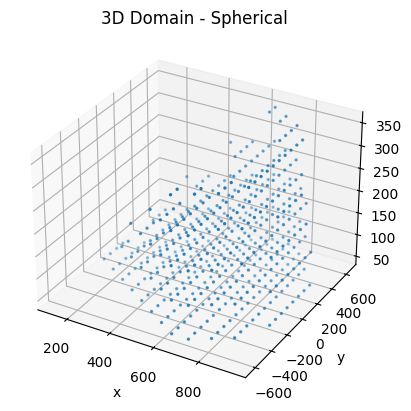

Data loaded from /PhD_project/data/processed_sim_data/sandbox
Plot saved at: /PhD_project/data/processed_sim_data/sandbox
Samples loaded from /PhD_project/results/regression_results/sandbox/instance_4


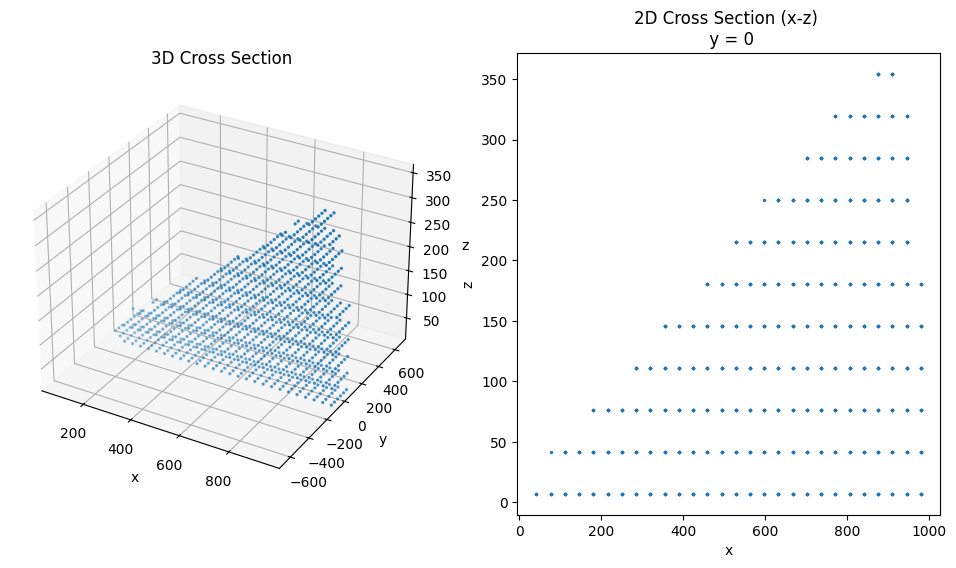

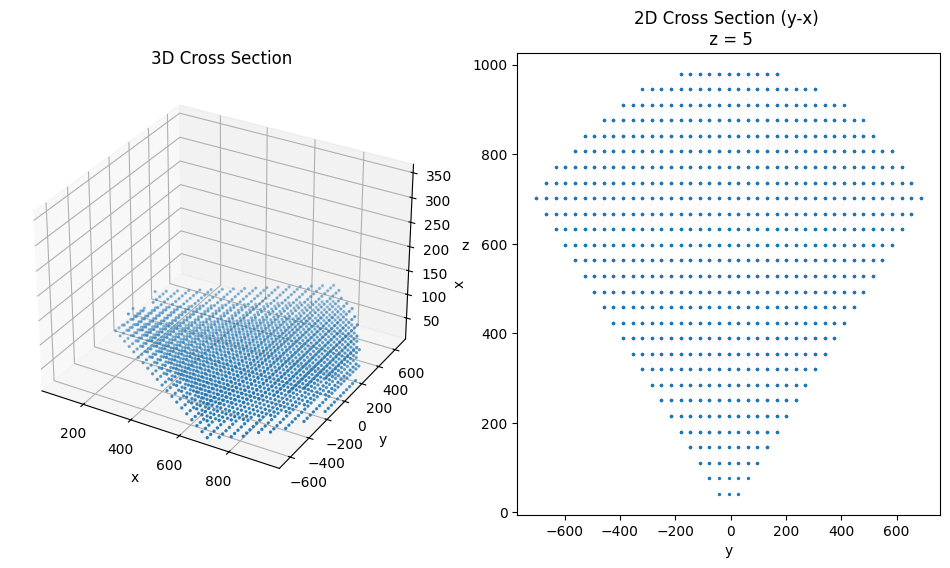

Exception: Visualiser - Invalid plot type!

In [5]:
sim_model = Model('log_gpm_norm').add_fixed_model_param('H', 5).add_fixed_model_param('I_y',0.22).add_fixed_model_param('I_z',0.2).add_fixed_model_param('Q',3.41e13)
sim_domain = Domain(3, 'spherical')
sim_domain.add_domain_param('radius', 1000).add_domain_param('mass', 10000).add_domain_param('theta', [-np.pi/8,np.pi/8]).add_domain_param('phi', [-np.pi/4,np.pi/4]).add_domain_param('center', [0,0,5])
sim_domain.build_domain()
sim_domain.cut_domain([0,0,0], [0,0,-1])
sim_domain.plot_domain()
sim_data_processor = SimDataProcessor('sandbox', sim_model, sim_domain,noise_dist='gaussian' ,noise_percentage=0.1)

model = Model('log_gpm_norm').add_fixed_model_param('H', 5).add_fixed_model_param('Q',3.41e13)
likelihood = Likelihood('gaussian_percentage_error')

I_y = Parameter(name='I_y',prior_select='uniform').add_prior_param('low',  0.0001).add_prior_param('high', 1)
I_z = Parameter(name='I_z',prior_select='uniform').add_prior_param('low',  0.0001).add_prior_param('high', 1)

error = Parameter(name='error',prior_select='uniform').add_prior_param('low',  0.0001).add_prior_param('high', 1)

inference_params = pd.Series({'I_y': I_y, 'I_z': I_z, 'error':error})

sampler = Sampler(inference_params, model, likelihood, sim_data_processor, n_samples = 10000, n_chains=3)
sampler.sample_all()


vis_domain = Domain(3, 'spherical')
vis_domain.add_domain_param('radius', 1000).add_domain_param('mass', 100000).add_domain_param('theta', [-np.pi/8,np.pi/8]).add_domain_param('phi', [-np.pi/4,np.pi/4]).add_domain_param('center', [0,0,5])
vis_domain.build_domain()
vis_domain.cut_domain([0,0,0], [0,0,-1])

vis_domain.apply_cross_section([0,0,5], [0,-1,0], width=100)
vis_domain.apply_cross_section([0,0,5], [0,0,1], width=100)
vis_domain.plot_cross_sections()
visualiser = RegressionVisualiser(sampler)
visualiser.show_predictions(vis_domain, 'test_plot', '2D_cross_sections', title = 'Concentration')
visualiser.show_predictions(vis_domain, 'test_plot', '3D', title = 'Concentration')
visualiser.show_predictions(vis_domain, 'test_plot', '3D_fixed', title = 'Concentration')